# 1. 토픽모델링
-lda 기본 활용

In [ ]:
# !pip install pyLDAvis == 3.4.1   # 3.4.1ver 이런것도 있음

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv("news2023.csv")

In [ ]:
df.head(1)

,news,date
0,\n7년만에 분기 손실… 메타도 순이익 21% 줄어\t\t\t\t\t\t\t코로나 ...,2022.04.30.


3. 전처리 및 명사 추출

In [ ]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

print(df.isnull().values.any()) #null값이 있는지 체크
train_data = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

train_data['news'] = train_data['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False
False


In [ ]:
train_data.news

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      \n7년만에 분기 손실… 메타도 순이익 21% 줄어\t\t\t\t\t\t\t코로나 ...
1      \n세계화 시대 저물며 국가·기업 역할 재설정생각을 바꿔 새로운 민관 협업모델 만들...
2      \n ━   SPECIAL REPORT      \n\n\n\n삼성전자의 화성 반도...
3      \n2차전지 등 소재 부문 공략인적·물적 분할은 하지않아SKC가 비즈니스 모델 전환...
4      \n[자전거·보행자 중심… ‘녹색교통’ 활용 높이자]페달 밟을수록 지구 건강… 생활...
                             ...                        
208    \n\t\t\t[경향신문] 기후위기는 보통 전문가들의 입을 통해 다뤄진다. 이들의 ...
209    \n\n\n\n\n정경옥 한국교통연구원 연구위원2020년 한 해에 약 2370만건이...
210    \n현대차-KB자산운용과 손잡고, 충전인프라 특수목적법인 추진롯데그룹이 2025년까...
211    \nLG마그나 이파워트레인GM 전기차 모터 등 생산\n\n\n\n19일 멕시코 라모...
212    \n유럽서 돌풍… 르노 수출 3배로\t\t\t\t\t\t\t르노코리아자동차의 준준형...
Name: news, Length: 213, dtype: object

In [ ]:
#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []

# 불용어 정의
stopwords = ['을', 'ㅋㅋ',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(train_data['news']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 213/213 [00:41<00:00,  5.19it/s]


213

In [ ]:
#tokenized_sentence[]
tokenized_data  #각 신문기사에서 나온 명사로 구성된 리스트들의 리스트


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['분기',
  '손실',
  '메타',
  '순이익',
  '코로나',
  '이후',
  '매',
  '분기',
  '실적',
  '신기록',
  '빅테크',
  '실적',
  '팬데믹',
  '공급망',
  '혼란',
  '지속',
  '인플레이션',
  '압박',
  '판매',
  '광고',
  '매출',
  '감소',
  '폭발',
  '성장',
  '세',
  '주춤',
  '것',
  '구글',
  '아마존',
  '시장',
  '상치',
  '못',
  '실적',
  '애플',
  '상대',
  '실적',
  '빅',
  '테크',
  '상황',
  '악화',
  '수',
  '경고',
  '아마존',
  '첫',
  '분기',
  '손실',
  '충격',
  '현지',
  '시각',
  '아마존',
  '이후',
  '첫',
  '분기',
  '손실',
  '기록',
  '매출',
  '작년',
  '로',
  '집계',
  '붕괴',
  '이후',
  '최저',
  '성장',
  '률',
  '아마존',
  '투자',
  '전기차',
  '업체',
  '리',
  '주가',
  '폭락',
  '손실',
  '기록',
  '클라우드',
  '가상',
  '서버',
  '부문',
  '아마존',
  '웹서비스',
  '전보',
  '매출',
  '선전',
  '온라인',
  '판매',
  '광고',
  '매출',
  '인플레이션',
  '영향',
  '시장',
  '상치',
  '밑',
  '아마존',
  '주가',
  '날',
  '실적',
  '발표',
  '후',
  '시간',
  '외',
  '거래',
  '폭락',
  '빅',
  '테크',
  '실적',
  '앞서',
  '지난',
  '구글',
  '모회사',
  '알파벳',
  '시장',
  '기대',
  '못',
  '성적표',
  '매출',
  '작년',
  '순이익',
  '감소',
  '주력',
  '사업인',
  '광고',
  '비즈니스',
  '성장',
  '주춤',
  

4. 워드클라우드 표현을 위해 토큰 결과에서 중복 제거 후 문자열로 변경

In [ ]:
words = []
for q in tokenized_data:
  for v in q: #각 신문기사의 명사들에 대해서
    if v not in words:
        words.append(v)

words = str(words)  #리스트->문자열로 변환

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- 워드클라우드 (malgun.ttf를 업로드 필요)  요즘 안 씀

In [ ]:
!unzip malgun.zip

Archive:  malgun.zip
  inflating: malgun.ttf              


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


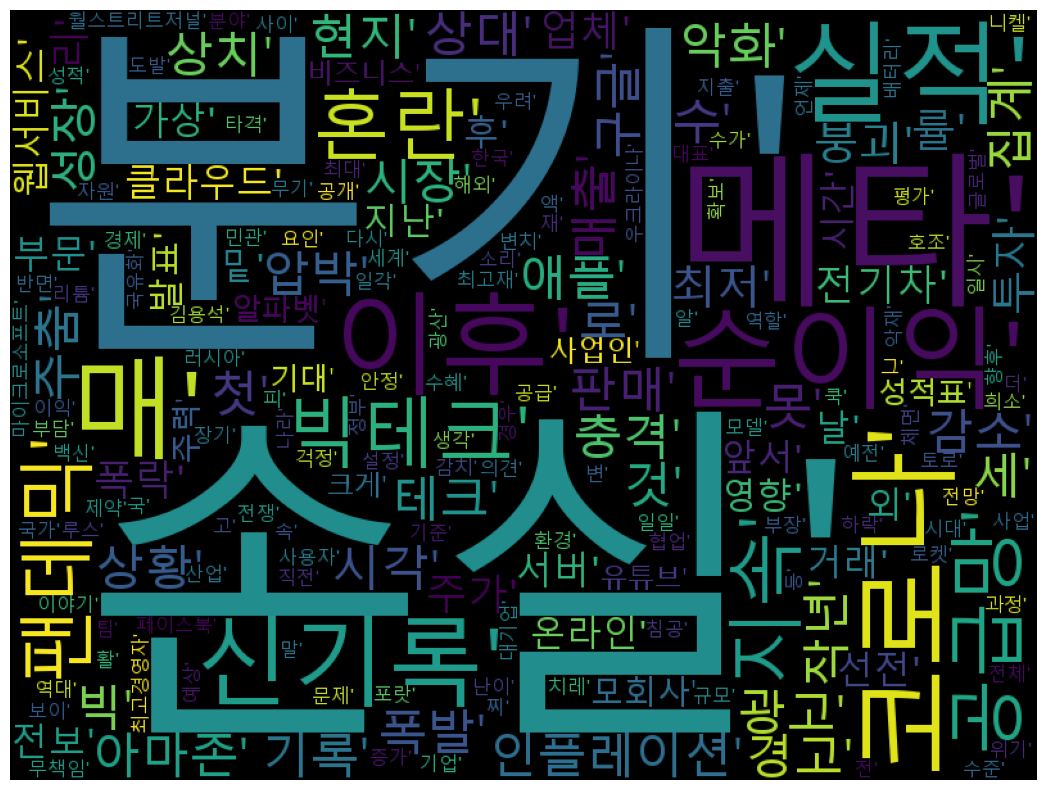

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#malgun.ttf를 업로드
wordcloud = WordCloud(font_path='malgun.ttf', background_color = "black", width = 800, height = 600).generate(words)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

5. LDA 적용

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data) #사전 구성
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS,
                                           id2word=dictionary, passes=15)

#각 토픽의 출현확률이 높은 단어를 지정된 갯수만큼 반환
topics = ldamodel.print_topics(num_words=20)

#위 내용을 출력
for topic in topics:
    print(topic)

(0, '0.015*"테슬라" + 0.012*"기아" + 0.012*"전기차" + 0.012*"현대차" + 0.009*"것" + 0.007*"주가" + 0.007*"등" + 0.007*"머스크" + 0.007*"평가" + 0.007*"약" + 0.006*"미국" + 0.006*"제네시스" + 0.006*"디자인" + 0.006*"부문" + 0.005*"수" + 0.005*"택시" + 0.005*"가격" + 0.005*"차량" + 0.005*"자동차" + 0.005*"트위터"')
(1, '0.018*"로봇" + 0.012*"것" + 0.010*"등" + 0.009*"전기차" + 0.007*"개발" + 0.007*"기술" + 0.007*"기아" + 0.007*"국내" + 0.007*"제어" + 0.006*"기업" + 0.006*"수" + 0.006*"그룹" + 0.005*"교수" + 0.005*"현대차" + 0.005*"고" + 0.005*"해외" + 0.005*"법인" + 0.004*"팀" + 0.004*"지능" + 0.004*"위"')
(2, '0.016*"자전거" + 0.014*"에너지" + 0.013*"등" + 0.011*"재생에너지" + 0.009*"탄소" + 0.008*"기업" + 0.008*"공장" + 0.008*"것" + 0.008*"배터리" + 0.007*"대학" + 0.006*"솔루션" + 0.006*"확대" + 0.006*"정책" + 0.006*"전기차" + 0.006*"전환" + 0.005*"목표" + 0.005*"세계" + 0.005*"지난해" + 0.005*"교통" + 0.005*"수"')
(3, '0.014*"기업" + 0.012*"니" + 0.010*"모델" + 0.009*"카카오" + 0.009*"택시" + 0.009*"등" + 0.008*"플러스" + 0.006*"광물" + 0.006*"제철" + 0.006*"수" + 0.005*"배터리" + 0.005*"확보" + 0.005*"국내" + 0.005*"통해" + 0.005*"기아" 

6. LDA 시각화

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.display(vis)


7. LDA의 토픽 개수 탐색

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

coherence_values = []
model_list = []
iters = [8, 9,10, 11, 12]

for num_topics in iters:
     model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
     model_list.append(model)
     coherencemodel = CoherenceModel(model=model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
     coherence_values.append(coherencemodel.get_coherence())

for i in range(0, len(iters)):
  print(model_list[i], coherence_values[i])  #topic num별로 coherence 가 높은 것을 찾기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LdaModel<num_terms=6241, num_topics=8, decay=0.5, chunksize=2000> 0.3067974506710591
LdaModel<num_terms=6241, num_topics=9, decay=0.5, chunksize=2000> 0.27223458571318004
LdaModel<num_terms=6241, num_topics=10, decay=0.5, chunksize=2000> 0.2918132173976007
LdaModel<num_terms=6241, num_topics=11, decay=0.5, chunksize=2000> 0.32001102028921763
LdaModel<num_terms=6241, num_topics=12, decay=0.5, chunksize=2000> 0.32164331535248253


#2. 임베딩(w2v + d2v)

1. Word2Vec 활용

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,
                 vector_size = 50,
                 window = 5,
                 min_count = 5,
                 workers = 4, sg = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
import numpy as np
model.wv.vectors.shape
model.wv.vectors[1]

np.mean( (model.wv.vectors[2]-model.wv.vectors[1])**2 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0081408005

In [ ]:
model.wv.key_to_index
model.wv.index_to_key

- 단어 간 거리 계산

In [ ]:
import numpy as np
np.sqrt(np.mean(model.wv.vectors[10]-model.wv.vectors[11])**2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.04717976972460747

- 유사한 단어 발견

In [ ]:
print(model.wv.most_similar("매출"))
print(model.wv.most_similar("배터리"))

[('원', 0.9979270100593567), ('해외', 0.997489333152771), ('관심', 0.9974010586738586), ('제기', 0.997143030166626), ('이유', 0.9971320033073425), ('진출', 0.9970884323120117), ('사실', 0.9970581531524658), ('현재', 0.997020423412323), ('최근', 0.9969537258148193), ('수준', 0.9969391226768494)]
[('당뇨', 0.9908376932144165), ('편의', 0.990553617477417), ('부위', 0.9904773235321045), ('조기', 0.9904640316963196), ('질', 0.9901958107948303), ('비만', 0.9901400804519653), ('군대', 0.9900785684585571), ('기분', 0.9900193810462952), ('폭로', 0.9899413585662842), ('법', 0.9899163842201233)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Doc2Vec 활용

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#각 문헌을 나타내는 리스트(단어들로 묶인) 하나하나에 대해 TaggedDocument 적용
#적용하실 때, words에다 각 뉴스를 나타내는 리스트, tags에는 각 뉴스의 아이디 입력
#아이디 입력 시, [아이디] 형태로 입력: 아이디에 해당하는 값을 리스트로 표현해서 입력
tagged_data = [TaggedDocument(words=tokenized_data[i], tags=[i]) for i in range(len(tokenized_data)) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


400

In [ ]:
model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=5,  #얻고자 하는 컬럼의 수, 한 문서를 몇개의 값의 좌표로 표현,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.docvecs.vectors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-61-615016936db2>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.vectors


array([[-0.05230815, -0.05979127, -0.09880754, ..., -0.05166649,
        -0.09717963,  0.02010779],
       [ 0.02830311,  0.04643556, -0.04297275, ...,  0.09225623,
        -0.09501867, -0.03458086],
       [-0.03769909,  0.02607382, -0.05691557, ..., -0.09954669,
         0.04933045, -0.09122308],
       ...,
       [-0.02687379,  0.09182398,  0.01921904, ..., -0.07142128,
        -0.09508411,  0.00584234],
       [-0.0005307 ,  0.01906138, -0.0006667 , ..., -0.09310038,
         0.09573311,  0.05673311],
       [ 0.07258704, -0.04445012, -0.02018584, ...,  0.0431612 ,
         0.01276428,  0.06500938]], dtype=float32)

In [ ]:
doc_list = '전기차 배터리 중요'.split(' ')
doc_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['전기차', '배터리', '중요']

In [ ]:
inferred_vector = model.infer_vector(doc_list)
inferred_vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.08907109,  0.01106775,  0.01531941,  0.01848712, -0.08976039],
      dtype=float32)

- 유사한 document 발견

In [ ]:
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-2e82f67434ad>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=5)


[(270, 0.9570250511169434),
 (202, 0.9013411998748779),
 (236, 0.8723969459533691),
 (250, 0.8686610460281372),
 (56, 0.8575427532196045)]

In [ ]:
return_docs = model.docvecs.most_similar(66,topn=3)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-b29b1cefbd05>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(66,topn=3)


[(186, 0.9339579939842224),
 (214, 0.9231314659118652),
 (314, 0.8570402264595032)]

# 3. 네이버 영화리뷰에 대해서 워드2벡터, Doc2Vec을  적용

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('ratings.txt', <http.client.HTTPMessage at 0x79f89fea9300>)

In [ ]:
df = pd.read_csv("ratings.txt", sep="\t") #값과 값사이가 tab문자로 구분
df = df[0:1000] #1000개의 리뷰만 사용
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
995,8089681,이준기 연기가 돋보였고 재밌음,1
996,9904906,평점이 왜이리 낮은지.. 공감하고 나를 많이 깨우치게 한영화입니다. 10점주는게 머...,1
997,8290332,다시 봐도 최고다~~~~,1
998,6758300,ㅋㅋㅋㅋㅋ진짜 짱임ㅋㅋㅋㅋㅋ거침없이 하이킥과 뉴논은 정말 최고다,1


In [ ]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

print(df.isnull().values.any()) #null값이 있는지 체크
train_data = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False
False


In [ ]:
#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []

# 불용어 정의
stopwords = ['을', 'ㅋㅋ',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(train_data['document']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1000/1000 [00:03<00:00, 327.66it/s]


1000

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data,
                 vector_size = 100,
                 window = 5,
                 min_count = 5,
                 workers = 4, sg = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(model.wv.most_similar("감동"))

[('대해', 0.45786750316619873), ('이해', 0.4569784104824066), ('수', 0.40572816133499146), ('계속', 0.3862457871437073), ('영화', 0.3861188292503357), ('연기', 0.38410520553588867), ('연출', 0.3729959726333618), ('진짜', 0.369366854429245), ('지금', 0.36379608511924744), ('평점', 0.35112759470939636)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.wv.vectors[0]
model.wv.key_to_index.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['영화', '정말', '최고', '연기', '진짜', '감동', '생각', '그', '것', '때', '보고', '수', '드라마', '다시', '내', '거', '사람', '지금', '더', '명작', '평점', '마지막', '마음', '재미', '스토리', '사랑', '말', '하나', '볼', '작품', '완전', '현실', '왜', '배우', '추천', '남자', '듯', '느낌', '뭐', '매력', '중', '굿', '이야기', '난', '감독', '장면', '한번', '한국', '저', '액션', '이영화', '꼭', '편', '주인공', '속', '대박', '역시', '정도', '연기력', '또', '기대', '대한', '인생', '가장', '알', '처음', '모습', '개인', '대해', '음악', '자신', '내용', '인간', '이해', '모든', '최고다', '가족', '때문', '연출', '짱', '만', '제', '봄', '이건', '무엇', '여운', '전', '기억', '계속', '그냥', '요', '영상', '일', '코믹', '모두', '눈물', '여자', '날', '걸', '시리즈', '당시', '안', '분', '아주', '함', '뭔가', '웃음', '표현', '만점', '매우', '맘', '언제', '개', '코미디', '기분', '노래', '약간', '임', '시간', '강추', '전쟁', '뿐', '캐릭터', '감', '후회', '움', '보기', '우리', '오페라', '시절', '소재', '끝', '그녀', '제목', '번', '우리나라', '제대로', '더욱', '사실', '이상', '세상', '감정', '수작', '팬', '성룡', '다운', '위', '비판', '제일', '중간', '명', '아버지', '추억', '삶', '결말', '잼', '살', '가슴', '미국', '친구', '내내', '목소리', '재밋다', '몰입', '거지', '간만', '사회', '배경', '나름', '엄마'

In [ ]:
tagged_data = [ TaggedDocument(words = tokenized_data[i], tags=[i]) for i in range(len(tokenized_data))]
len(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1000

In [ ]:
model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=10,  #얻고자 하는 컬럼의 수, 한 문서를 몇개의 값의 좌표로 표현,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#model.docvecs.vectors_docs
model.docvecs.vectors

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-bd0336538d02>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.vectors


array([[-0.05230815, -0.05979127, -0.09880754, ..., -0.05166649,
        -0.09717963,  0.02010779],
       [ 0.02830311,  0.04643556, -0.04297275, ...,  0.09225623,
        -0.09501867, -0.03458086],
       [-0.03769909,  0.02607382, -0.05691557, ..., -0.09954669,
         0.04933045, -0.09122308],
       ...,
       [-0.02687379,  0.09182398,  0.01921904, ..., -0.07142128,
        -0.09508411,  0.00584234],
       [-0.0005307 ,  0.01906138, -0.0006667 , ..., -0.09310038,
         0.09573311,  0.05673311],
       [ 0.07258704, -0.04445012, -0.02018584, ...,  0.0431612 ,
         0.01276428,  0.06500938]], dtype=float32)

In [ ]:
df.label

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: label, Length: 1000, dtype: int64

In [ ]:
doc_list = '주연배우 연기 중요 감독 액션 극장 발연기'.split(' ')
doc_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['주연배우', '연기', '중요', '감독', '액션', '극장', '발연기']

In [ ]:
inferred_vector = model.infer_vector(doc_list)
inferred_vector

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 0.02851426,  0.00502103,  0.03004944, -0.04829016, -0.019588  ,
       -0.0177101 , -0.02785104,  0.04866942, -0.03863888,  0.02552165],
      dtype=float32)

- 유사한 document 발견

In [ ]:
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-59-039c39141f3d>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)


[(74, 0.7934443354606628),
 (324, 0.7673429250717163),
 (49, 0.7599236369132996),
 (188, 0.7397239804267883),
 (194, 0.7296202182769775),
 (220, 0.7180415391921997),
 (468, 0.7168328166007996),
 (268, 0.7120748162269592),
 (169, 0.705742359161377),
 (746, 0.6961223483085632)]

In [ ]:
return_docs = model.docvecs.most_similar(348,topn=3)
return_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-60-85df66fe77e6>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(348,topn=3)


[(455, 0.782914400100708), (660, 0.7444680333137512), (745, 0.743675947189331)]